# Project: Soccer Database Analysis
## syllabus
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#import">Import Modules</a></li><br />
Best players of 2007-2016
<li><a href="#wrangling-question1">Data Wrangling</a></li>
<li><a href="#eda-question1">Exploratory Data Analysis</a></li><br />
What player attributes lead to the best player
<li><a href="#wrangling-question2">Data Wrangling</a></li>
<li><a href="#eda-question2">Exploratory Data Analysis</a></li><br />
Does a higher team's overall_rating leads to a better team (win percentage)
<li><a href="#wrangling-question3">Data Wrangling</a></li>
<li><a href="#eda-question3">Exploratory Data Analysis</a></li><br />
Conclusions
<li><a href="#conclusions-limitations of the data1">Limitations of the data: player_overall_rating.csv</a></li>
<li><a href="#conclusions-limitations of the data2">Limitations of the data: team_match.csv</a></li>
<li><a href="#conclusions-1">Best players of 2007-2016</a></li>
<li><a href="#conclusions-2">What player attributes lead to the best player</a></li>
<li><a href="#conclusions-3">Does a higher team's overall_rating leads to a better team (win percentage)</a></li>
</ul>

<a id='intro'></a>
## Introduction
#### Database contains 8 tables: Country, League, Match, Player, Player_attributes, Team, Team_attributes, sqlite_sequence. 

>**Country:** Labels: id, name. Shape: 10\*2.<br />
>**League:** Labels: id, country_id, name. Shape: 10\*3.<br />
>**Match:** Labels: id, country_id, league_id, season, stage, ..., BSA. Shape:25979\*115.<br />
>**Player:** labels: id, player_api_id, player_name, ..., weight. Shape: 11060\*7.<br />
>**Player_Attributes:** Labels: id, ..., overall_rating, ..., gk_reflexes. Shape: 183978\*42.<br />
>**Team:** Labels: id, ..., team_short_name. Shape: 299\*5.<br />
>**Team_Attributes:** Labels: id, ..., defenceDefenderLineClass. Shape: 1458\*25..<br />
>**sqlite_sequence:** Labels: Team, Country, ..., Team_Attributes. Shape: 7\*2.<br />
>**Note:** 2008 to 2016.<br />

#### Questions & Rough Answers:

>**2008-2016 Best player:**<br />
>Player: Lionel Messi, Average rating from 2007-2016: 91.3624338624<br />
>**What player attributes lead to the best player:**<br />
>Attribute: 'reactions' has the largest correlation value with 'overall_rating'. There is no negative correlation value withing 33 attribtues with 'overall_rating'.<br />
>**Does a higher team's overall_rating leads to a better team:**<br />
>Based on England Premier League 2015/2016 season, while 'team overall_rating' has a positive correlation with 'win percentage', rating of the best team Leicester City is almost the same as the worst team Aston Villa.<br />

<a id='import'></a>
## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling-question1'></a>
## Data Wrangling - Best players of 2007-2016

> **Step1:** Since players' names and overall_ratings are listed in different tables, I have to combine them in SQLite.<br />
> **Step2:** Clean duplicated and NaN samples.<br />
> **Step3:** Create 'year' columns and group the samples by player_id, name and year.<br />
> **Step4:** Get the top 0.1 percent of overall rating.<br />
> **Step5:** Get the players whose overall ratings are above top 0.1 percent.<br />

In [2]:
# SQLite code

# SELECT pa.player_api_id, pa.date, pa.overall_rating, p.player_name
# FROM Player_Attributes pa
# JOIN Player p
# ON pa.player_api_id = p.player_api_id


In [3]:
# read data & data samples
player_rate_raw = pd.read_csv('player_overall_rating.csv')
player_rate_raw.head(3)

,player_api_id,date,overall_rating,player_name
0,505942,2016-02-18 00:00:00,67.0,Aaron Appindangoye
1,505942,2015-11-19 00:00:00,67.0,Aaron Appindangoye
2,505942,2015-09-21 00:00:00,62.0,Aaron Appindangoye


In [4]:
# data info
player_rate_raw.info()
player_rate_raw.describe()

# drop duplicated & nan samples
player_rate_raw.drop_duplicates(inplace=True)
player_rate_raw.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 4 columns):
player_api_id     183978 non-null int64
date              183978 non-null object
overall_rating    183142 non-null float64
player_name       183978 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 5.6+ MB


In [5]:
# create 'year' columns
player_rate_raw['date'] = pd.to_datetime(player_rate_raw['date'])
player_rate_raw['year'] = player_rate_raw['date'].dt.year

# get each player's overall_rating on each year
player_rate_group_id_y = player_rate_raw.groupby(['player_api_id','player_name','year'],as_index=False).mean()
player_rate_group_id_y.head(3)

,player_api_id,player_name,year,overall_rating
0,2625,"Patryk Rachwal,18",2007,63.0
1,2625,"Patryk Rachwal,18",2008,60.0
2,2625,"Patryk Rachwal,18",2010,60.0


In [6]:
# get each player's average overall-rating from 2007-2016
player_rate_ave = player_rate_group_id_y.groupby(['player_api_id','player_name']).mean()
player_rate_ave.head(3)

,,year,overall_rating
player_api_id,player_name,,
2625,"Patryk Rachwal,18",2011.25,60.1875
2752,Diego Mainz,2011.25,68.0000
2768,Jose Dorado,2011.50,67.5400


In [7]:
# get the overall_rating of the top 0.1 percent player.
outstanding = player_rate_ave['overall_rating'].quantile(0.999)

# get playes whose overall_ratings are higher than outstanding
player_rate_outsanding = player_rate_ave.query('overall_rating > {}'.format(outstanding)).drop('year', axis=1)
player_rate_outsanding

,,overall_rating
player_api_id,player_name,
30613,Cesc Fabregas,86.530000
30657,Iker Casillas,87.530000
30717,Gianluigi Buffon,86.654167
30829,Wayne Rooney,87.655000
30834,Arjen Robben,87.520000
30893,Cristiano Ronaldo,90.844444
30894,Philipp Lahm,86.550000
30924,Franck Ribery,87.825000
30955,Andres Iniesta,87.638889


<a id='eda-question1'></a>
## Exploratory Data Analysis - Best players of 2007-2016

Best Player: (30981, 'Lionel Messi') , Average rating from 2008-2016: 91.3624338624


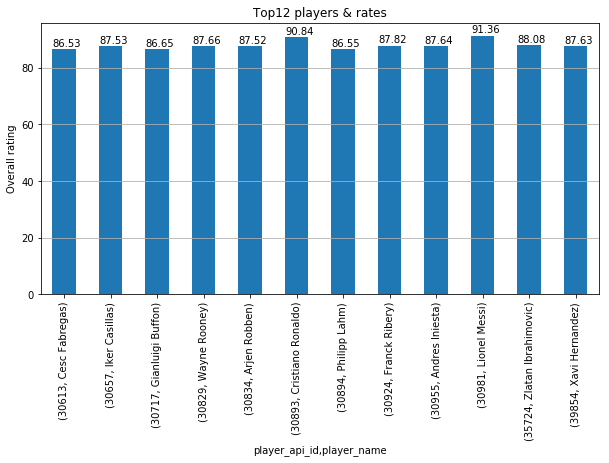

In [8]:
# default setting of bar-chart
plot1 = player_rate_outsanding.plot(kind='bar', figsize=(10,5), title='Top12 players & rates', legend=False)

# annotate each bar with its value
for person, rate in enumerate(player_rate_outsanding['overall_rating']):
    value = np.round(player_rate_outsanding['overall_rating'][person], decimals=2)
    plot1.annotate(value, xy=(person-0.25, value+1))

# set y-axis label & only draw horizontal lines
plot1.set_ylabel('Overall rating')
plot1.yaxis.grid()

# get the best player's name & id, and his overall rating
print('Best Player:',player_rate_outsanding['overall_rating'].argmax(),
      ', Average rating from 2008-2016:',player_rate_outsanding['overall_rating'].max())

<a id='wrangling-question2'></a>
## Data Wrangling - What player attributes lead to the best player

> **Step1:** Transform table Player_Attributes from SQLite to CSV.<br />
> **Step2:** Clean duplicated and NaN samples.<br />
> **Step3:** Select columns that are not composed of str.<br />
> **Step4:** derive correlatinos from 'overall_rating with other attributes'.<br />

In [9]:
# SQLite code

# SELECT *
# FROM Player_Attributes


In [10]:
# read data & data samples
player_attributes_raw = pd.read_csv('player_attributes.csv')
player_attributes_raw.head(3)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


In [11]:
# data info
player_attributes_raw.info(max_cols=5)

# drop duplicated & nan samples
player_attributes_raw.drop_duplicates(inplace=True)
player_attributes_raw.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Columns: 42 entries, id to gk_reflexes
dtypes: float64(35), int64(3), object(4)
memory usage: 59.0+ MB


In [12]:
# get non-str attributes 
player_attributes = player_attributes_raw.iloc[:,np.r_[2,4,9:42]].groupby('player_api_id').mean()
player_attributes.head(3)

,overall_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player_api_id,,,,,,,,,,,,,,,,,,,,,
2625,60.142857,50.142857,47.285714,46.285714,56.500000,38.000000,54.142857,50.000000,49.928571,65.571429,...,55.285714,61.928571,62.928571,63.857143,56.571429,12.428571,12.857143,19.071429,10.357143,10.428571
2752,69.380952,36.428571,37.428571,75.333333,54.809524,20.428571,44.857143,30.428571,18.857143,59.571429,...,52.428571,35.428571,71.095238,70.666667,65.571429,11.095238,6.095238,7.095238,9.095238,15.095238
2768,69.285714,42.238095,42.761905,66.666667,64.714286,28.761905,40.238095,51.761905,20.047619,57.000000,...,57.761905,31.904762,71.666667,70.619048,79.714286,10.761905,15.904762,22.714286,15.142857,12.095238


In [13]:
# derive correlatinos from overall_rating with other attributes
correlations = pd.concat([pd.DataFrame([player_attributes['overall_rating'].corr(player_attributes[attribute])], 
                                       index=[attribute], columns=['corr_with_overall_rating']) 
                          for attribute in player_attributes])
correlations.drop('overall_rating', axis=0, inplace=True)
correlations.sort_values(by='corr_with_overall_rating', axis=0, ascending=False, inplace=True)

<a id='eda-question2'></a>
## Exploratory Data Analysis - What player attributes lead to the best player

In [14]:
# get top 10% of correlations
top_10 = correlations.quantile(0.90)[0]
top_corr = correlations[correlations['corr_with_overall_rating'] > top_10]
top_corr

,corr_with_overall_rating
reactions,0.799142
vision,0.482322
long_passing,0.440110
penalties,0.425534


In [15]:
# get down 10% of correlations
down_10 = correlations.quantile(0.10)[0]
down_corr = correlations[correlations['corr_with_overall_rating'] < down_10]
down_corr

,corr_with_overall_rating
gk_positioning,0.050184
gk_handling,0.048651
gk_reflexes,0.045869
gk_diving,0.019516


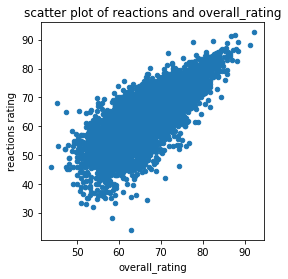

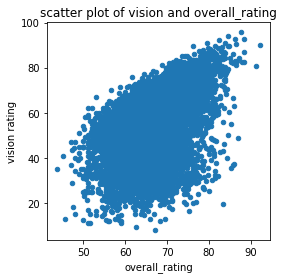

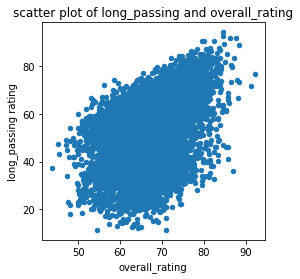

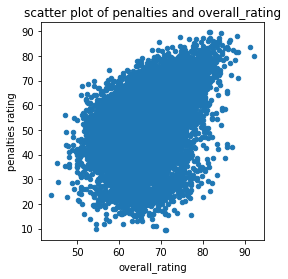

In [16]:
# print the scatter plot of top 10% correlations
for attribute in top_corr.index.values:
    y_axis_name = attribute+' rating'
    player_attributes.plot(x='overall_rating', y=attribute, kind='scatter', figsize=(4,4))
    scatter_title = 'scatter plot of '+attribute+' and overall_rating'
    plt.title(scatter_title)
    plt.ylabel(y_axis_name)

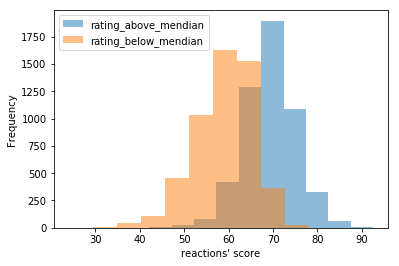

In [17]:
# plot the reactions histogram of two groups of soccer players seperated by overall_rating
median_overall = player_attributes['overall_rating'].median()
player_attributes_high = player_attributes[player_attributes['overall_rating'] > median_overall]
player_attributes_low = player_attributes[player_attributes['overall_rating'] <= median_overall]
player_attributes_high['reactions'].plot(kind='hist', alpha=0.5, label='rating_above_mendian')
player_attributes_low['reactions'].plot(kind='hist', alpha=0.5, label='rating_below_mendian')
plt.xlabel('reactions\' score')
plt.legend()

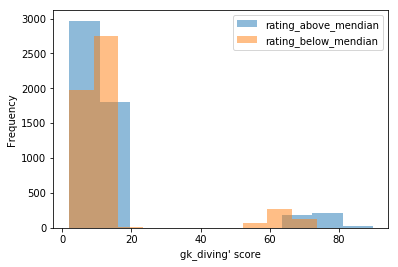

In [18]:
# plot the gk_diving histogram of two groups of soccer players seperated by overall_rating
median_overall = player_attributes['overall_rating'].median()
player_attributes_high = player_attributes[player_attributes['overall_rating'] > median_overall]
player_attributes_low = player_attributes[player_attributes['overall_rating'] <= median_overall]
player_attributes_high['gk_diving'].plot(kind='hist', alpha=0.5, label='rating_above_mendian')
player_attributes_low['gk_diving'].plot(kind='hist', alpha=0.5, label='rating_below_mendian')
plt.xlabel('gk_diving\' score')
plt.legend()

<a id='wrangling-question3'></a>
## Data Wrangling - Does a higher team's overall_rating leads to a better team

#### **Step1-4:** Create 'match_result' table
> **Step1:** Combine tree tables in SQLite in order to get raw data, such as leagues, teams, goals.<br />
> **Step2:** Clean duplicated and NaN samples.<br />
> **Step3:** Filter raw data by league and season.<br />
> **Step4:** Get numbers of winning/losing/draw/total games and win_percentage of each team in the specificed league and season.<br />

#### **Step5-7:** Create 'teams' ratings' table
> **Step5:** Get players' average overall_ratings based on specified season from the raw data of Best players of 2007-2016.<br />
> **Step6:** Replace play_api_id with the corresponding player's average overall_rating.<br />
> **Step7:** Use each player's average overall_rating to get teams' average ratings.<br />

#### **Step8:** Combine match_result and teams' ratings
> **Step8:** The final table composed of match_result and teams' ratings.

In [19]:
# SQLite code

# SELECT le.name, ma.season, ma.home_team_api_id, te1.team_long_name home_team,
#         ma.away_team_api_id, te2.team_long_name away_team, ma.home_team_goal, ma.away_team_goal,
#         ma.home_player_1, ma.home_player_2, ma.home_player_3, ma.home_player_4, 
#         ma.home_player_5, ma.home_player_6, ma.home_player_7, ma.home_player_8, 
#         ma.home_player_9, ma.home_player_10, ma.home_player_11,
#         ma.away_player_1, ma.away_player_2, ma.away_player_3, ma.away_player_4, 
#         ma.away_player_5, ma.away_player_6, ma.away_player_7, ma.away_player_8, 
#         ma.away_player_9, ma.away_player_10, ma.away_player_11
# FROM League le
# JOIN Match_info ma
# ON le.id = ma.league_id
# JOIN Team te1
# ON ma.home_team_api_id = te1.team_api_id
# JOIN Team te2
# ON ma.away_team_api_id = te2.team_api_id
# WHERE le.name IN ('England Premier League','Spain LIGA BBVA','Italy Serie A',
#                     'Germany 1. Bundesliga','France Ligue 1')


In [20]:
# read data & data samples
team_match_raw = pd.read_csv('team_match.csv')
team_match_raw.head(3)

,name,season,home_team_api_id,home_team,away_team_api_id,away_team,home_team_goal,away_team_goal,home_player_1,home_player_2,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,England Premier League,2008/2009,10260,Manchester United,10261,Newcastle United,1,1,30726.0,30362.0,...,25518.0,24228.0,30929.0,29581.0,38807.0,40565.0,30360.0,33852.0,34574.0,37799.0
1,England Premier League,2008/2009,9825,Arsenal,8659,West Bromwich Albion,1,0,23686.0,26111.0,...,36832.0,23115.0,37280.0,24728.0,24664.0,31088.0,23257.0,24171.0,25922.0,27267.0
2,England Premier League,2008/2009,8472,Sunderland,8650,Liverpool,0,1,32562.0,38836.0,...,37442.0,30617.0,24134.0,414792.0,37139.0,30618.0,40701.0,24800.0,24635.0,30853.0


In [21]:
# data info
team_match_raw.info(max_cols=3)

# drop duplicated & nan samples
team_match_raw.drop_duplicates(inplace=True)
team_match_raw.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585 entries, 0 to 14584
Columns: 30 entries, name to away_player_11
dtypes: float64(22), int64(4), object(4)
memory usage: 3.3+ MB


In [22]:
# filter 'team_match_raw' by league & season
team_match_raw.rename(columns={'name':'league'}, inplace=True)
team_match_raw.iloc[:,8:36] = team_match_raw.iloc[:,8:36].astype(int)
# 5 leagues: 'England Premier League','Spain LIGA BBVA','Italy Serie A','Germany 1. Bundesliga','France Ligue 1'
league_match = team_match_raw[team_match_raw['league'] == 'England Premier League']
# 8 seasons: '2008/2009','2009/2010', ...,'2014/2015','2015/2016
league_match_season = league_match[league_match['season'] == '2015/2016']
league_match_season.head(3)

,league,season,home_team_api_id,home_team,away_team_api_id,away_team,home_team_goal,away_team_goal,home_player_1,home_player_2,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
2660,England Premier League,2015/2016,9825,Arsenal,8654,West Ham United,0,2,30859,26154,...,109897,35110,49543,155782,37169,575789,148302,25496,18506,192899
2661,England Premier League,2015/2016,8678,Bournemouth,10252,Aston Villa,0,1,30974,35515,...,183500,24208,161414,473853,261313,179410,182223,23991,154280,23264
2662,England Premier League,2015/2016,8455,Chelsea,10003,Swansea City,2,2,170323,31306,...,111800,155050,24948,102356,127130,144996,95955,157729,52563,26344


In [23]:
# get the summary of matches of the specified league and season
def match_arrange1(df):
    if df['home_team_goal'] > df['away_team_goal']:
        df['win'] = df['home_team']
        df['lose'] = df['away_team']
        df['draw_home'] = None
        df['draw_away'] = None
    elif df['home_team_goal'] < df['away_team_goal']:
        df['win'] = df['away_team']
        df['lose'] = df['home_team']
        df['draw_home'] = None
        df['draw_away'] = None
    elif df['home_team_goal'] == df['away_team_goal']:
        df['win'] = None
        df['lose'] = None
        df['draw_home'] = df['home_team']
        df['draw_away'] = df['away_team']
    return df

def match_arrange2(match_raw):
    win = match_raw['win'].value_counts().to_frame()
    lose = match_raw['lose'].value_counts().to_frame()
    dh = match_raw['draw_home'].value_counts().to_frame()
    da = match_raw['draw_away'].value_counts().to_frame()
    match_result = pd.concat([win, lose, dh, da], axis=1)
    match_result['draw'] = match_result['draw_home']+match_result['draw_away']
    match_result.drop(labels=['draw_home','draw_away'], axis=1, inplace=True)
    match_result['total'] = match_result['draw']+match_result['win']+match_result['lose']
    match_result['win_percentage'] = match_result['win']/match_result['total']
    return match_result


match_raw = league_match_season.apply(match_arrange1, axis=1)
match_result = match_arrange2(match_raw)
match_result.head(3)

,win,lose,draw,total,win_percentage
Arsenal,20,7,11,38,0.526316
Aston Villa,3,27,8,38,0.078947
Bournemouth,11,18,9,38,0.289474


In [24]:
# get the players' average overall_rating based on season
player_rate_season = player_rate_raw[(player_rate_raw['date'] >= '2015-09-01')&
                                     (player_rate_raw['date'] < '2016-09-01')]
player_mrate_season = player_rate_season.groupby(['player_api_id','player_name'], 
                                                 as_index=True)['overall_rating'].mean()
player_mrate_season.head(3)

player_api_id  player_name   
2752           Diego Mainz       72.0
2768           Jose Dorado       74.8
2796           Javier Jimenez    68.0
Name: overall_rating, dtype: float64

In [25]:
# replace play_api_id with its average average overall_rating

def get_rating(x):
    rate = player_mrate_season.loc[x][0]
    return rate

home_away_players = ['home_player_1','home_player_2','home_player_3','home_player_4','home_player_5',
                     'home_player_6','home_player_7','home_player_8','home_player_9','home_player_10',
                     'home_player_11','away_player_1','away_player_2','away_player_3','away_player_4',
                     'away_player_5','away_player_6','away_player_7','away_player_8','away_player_9',
                     'away_player_10','away_player_11']

for player in home_away_players:
    league_match_season[player] = league_match_season[player].apply(get_rating)
    
league_match_season.head(3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,league,season,home_team_api_id,home_team,away_team_api_id,away_team,home_team_goal,away_team_goal,home_player_1,home_player_2,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
2660,England Premier League,2015/2016,9825,Arsenal,8654,West Ham United,0,2,85.5,79.333333,...,73.4,79.166667,78.600000,73.375,76.2,63.333333,75.285714,83.250000,76.0,75.000000
2661,England Premier League,2015/2016,8678,Bournemouth,10252,Aston Villa,0,1,76.0,72.000000,...,72.4,78.222222,76.333333,75.000,76.0,75.000000,74.500000,75.400000,76.0,73.833333
2662,England Premier League,2015/2016,8455,Chelsea,10003,Swansea City,2,2,86.0,80.000000,...,74.0,78.000000,81.000000,74.000,77.0,77.000000,79.000000,78.222222,77.0,77.333333


In [26]:
# get teams' average ratings and drop players' ratings
league_match_season['home_rating'] = pd.DataFrame.mean(league_match_season.iloc[:,8:19],axis=1)
league_match_season['away_rating'] = pd.DataFrame.mean(league_match_season.iloc[:,19:30],axis=1)
league_match_season.drop(labels=home_away_players, axis=1, inplace=True)
league_match_season.head(3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

,league,season,home_team_api_id,home_team,away_team_api_id,away_team,home_team_goal,away_team_goal,home_rating,away_rating
2660,England Premier League,2015/2016,9825,Arsenal,8654,West Ham United,0,2,82.287879,75.600974
2661,England Premier League,2015/2016,8678,Bournemouth,10252,Aston Villa,0,1,72.227273,75.426263
2662,England Premier League,2015/2016,8455,Chelsea,10003,Swansea City,2,2,84.074747,77.323232


In [27]:
# get the final table composed of match_result and teams' ratings
hteam_mrating = league_match_season.groupby('home_team')['home_rating'].mean()
ateam_mrating = league_match_season.groupby('away_team')['away_rating'].mean()
team_mrating = (hteam_mrating+ateam_mrating)/2
team_mrating = team_mrating.to_frame(name='team_rating')
match_and_rating = pd.concat([match_result, team_mrating], axis=1)
match_and_rating.sort_values('win_percentage', ascending=False)

,win,lose,draw,total,win_percentage,team_rating
home_team,,,,,,
Leicester City,23,3,12,38,0.605263,74.945001
Arsenal,20,7,11,38,0.526316,80.977558
Tottenham Hotspur,19,6,13,38,0.500000,78.976576
Manchester United,19,10,9,38,0.500000,79.967344
Manchester City,19,10,9,38,0.500000,82.030582
Southampton,18,11,9,38,0.473684,76.397528
Liverpool,16,10,12,38,0.421053,78.057627
West Ham United,15,8,13,36,0.416667,76.210543
Stoke City,14,15,9,38,0.368421,76.587537


<a id='eda-question3'></a>
## Exploratory Data Analysis - Does a higher team's overall_rating leads to a better team

England Premier League 2015/2016 Season
Correlation of win_percentage and team_ratin: 0.488035029371


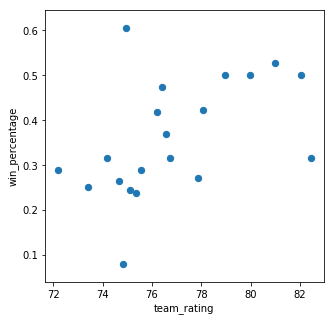

In [28]:
# Get the scatter plot and correlation of win_percentage and team_ratin 
match_and_rating.plot(x='team_rating', y='win_percentage', kind='scatter', s=40, figsize=(5,5))
print('England Premier League 2015/2016 Season')
print('Correlation of win_percentage and team_ratin:',
      match_and_rating['team_rating'].corr(match_and_rating['win_percentage']))

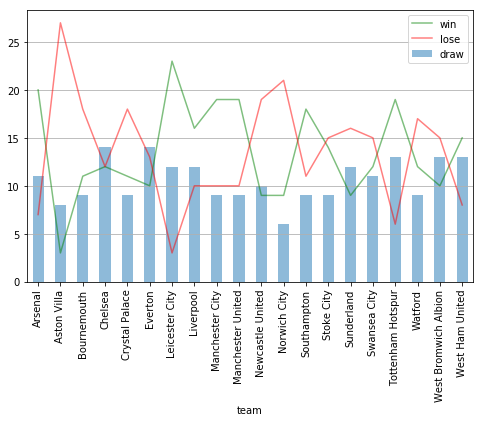

In [29]:
match_and_rating['win'].plot(kind='line', alpha=0.5, label='win', color='green', figsize=(8,5))
match_and_rating['lose'].plot(kind='line', alpha=0.5, label='lose', color='red', figsize=(8,5))
match_and_rating['draw'].plot(kind='bar', alpha=0.5, label='draw', figsize=(8,5))
plt.grid(axis='y')
plt.xlabel('team')
plt.legend()

<a id='conclusions-limitations of the data1'></a>
## Conclusions - Limitations of player_overall_rating.csv and solutions

**Limitations of player_overall_rating.csv:**<br />
><li>There is a duplication in this csv, it is shown in the next block, and it also contains an NaN.</li>
><li>There are 836 samples that their overall_rating are NaN.</li>
><li>Each players have different times of overall_rating, this limitation leads to a bias, the best way to handle it is to use the players that have the same times of overall_rating.</li>

**Solutions to player_overall_rating.csv:**<br />
><li>Since the sample size is large, according to the central limit theory, I believe those samples can still represent the population somehoe, eventhough I drop 836 NaN samples.</li>
><li>Another reason that I drop these NaN samples is that no one can be sure for ratings of players, because even normal people like us do have a dynamic physical condition everyday, and I believe that we can not judge the ratings when there is no examination.</li>
><li>I choose to ignore the bias of different times of overall_rating of each player, because data would be fractional and not enough to do further analysis. For example, if I drop the players with only two times of overall_ratings, then I can not compute a team's overall_rating, because of missing some players' overall_ratings. </li>

In [30]:
# Reminds of player_overall_rating.csv
check = pd.read_csv('player_overall_rating.csv')
print('Duplicated:')
print(check[check.duplicated()])
print('\n\nNaN:')
print(check[check['overall_rating'].isnull() == True].head(3))

Duplicated:
       player_api_id                 date  overall_rating  player_name
84924          32968  2007-02-22 00:00:00             NaN  John Potter


NaN:
      player_api_id                 date  overall_rating       player_name
483           31684  2007-02-22 00:00:00             NaN  Abdeslam Ouaddou
983           29904  2007-02-22 00:00:00             NaN        Abel Gomez
1752          24159  2007-02-22 00:00:00             NaN      Adam Johnson


<a id='conclusions-limitations of the data2'></a>
## Conclusions - Limitations of team_match.csv and solutions

**Limitations of team_match.csv:**<br />
><li>There are 929 rows that have NaN for their columns.</li>
><li>The datatypes of home_player_1, ..., away_player_11 are float64.</li>
><li>There is no overall_rating for each player in this table, so I have to acquire them by myself.</li>

**Solutions to team_match.csv:**<br />
><li>929 NaN rows are dropped, because I consider that samples are large enough.</li>
><li>I tranform the datatypes into int, so I can compare them with another table.</li>
><li>After comparing with the table I made from player_overall_rating.csv, I replace the player_api_id of home_player_1, ..., away_player_11 with the overall_ratings.</li>

In [31]:
check = pd.read_csv('team_match.csv') 
print('Duplicated: None')
# check[check.duplicated()] 
print(check[check.isnull() == True].head(1))

Duplicated: None
  name season  home_team_api_id home_team  away_team_api_id away_team  \
0  NaN    NaN               NaN       NaN               NaN       NaN   

   home_team_goal  away_team_goal  home_player_1  home_player_2  \
0             NaN             NaN            NaN            NaN   

        ...        away_player_2  away_player_3  away_player_4  away_player_5  \
0       ...                  NaN            NaN            NaN            NaN   

   away_player_6  away_player_7  away_player_8  away_player_9  away_player_10  \
0            NaN            NaN            NaN            NaN             NaN   

   away_player_11  
0             NaN  

[1 rows x 30 columns]


<a id='conclusions-1'></a>
## Conclusions - Best players of 2007-2016

**Raw data constraints:**<br />
><li>There are 11060 players and 183142 records, which means that number of each player's records is different, for example, player_id 210278 has 56 records while player_id 9144 has 2 records.</li>
><li>Recording time of each record is different, which means that the overall_rating of each player is time biased. Eventhough two players have the same number of records, their recoding times are different.</li>
><li>Missing records. A player might have records on 2007-2010 and 2012-2016, but no records on 2011.</li>
><li>Periods between each records are not the same. For example, there might be 8 records on 2015, but only 1 on 2009.</li>

**Result:**<br />
><li>Based on the constraints above, Lionel Messi is the best player with a average rating 91.3624338624 for 2007-2016.</li>
><li>The reviewer should notice: Although Messi has the best average rating for 2007-2016, it doesn't means that Messi has the best average rating of any specific yeay.</li>

<a id='conclusions-2'></a>
## Conclusions - What player attributes lead to the best player

**Raw data constraints:**<br />
><li>Three labels, preferred_foot, attacking_work_rate and defensive_work_rate, are not used in my analysis, because they are discrete data and arbitrary. It is hard to transform them into numerical data.</li>
><li>I didn't find the formula for computing overall_rating on player's attributes. For example, I don't know whether the weight of 'reactions' is higher than the weight of 'vision'. Therefore, I assume that all weights are equal.</li>
><li>I didn't konw that whether there is a causal relation between each attributes, so I assume all attributes are independent variables.</li>


**Result:**<br />
><li>Based on the constraints above, 'reactions' is the attribute that has the highest correlation with overall_raintg.</li>
><li>Although reactions has the highest correlation with overall_raintg, it doesn't means that a unit-increased in reactions can increase more units in overall_rating than other attributes. The highest correlation only indicates that overall_rating is more likely to increase when reactions increase.</li>
><li>According to the reactions histogram of two groups of soccer players, which are seperated by overall_rating, one can find that the players with higher overall_rating are more likely to have higher reactions.</li>
><li>According to the gk_diving histogram of two groups of soccer players, which are seperated by overall_rating, one can find that gk_diving doesn't play an important role in overall_rating. However, I have computed the correlations of overall_rating with other attributes, gk_diving has the lowest correlation, which is 0.019516 </li>


<a id='conclusions-3'></a>
## Conclusions - Does a higher team's overall_rating leads to a better team

**Raw data constraints:**<br />
><li>Two tables are needed in this case.</li>
><li>The first table is the same as the table of 'Best players of 2007-2016', which means constraints are the same in this table. These constraints can lead to an annoying obstacle in deriving a team's rating from that team's players' overall_ratings. For example, a player's overall_rating is missing on 2008/2009 season, but that player appears in the record of a match on 2008/2009 season.</li>
><li>I have to create my raw data table by composing League, Match_info and Team tables in SQLite. By the way, I rename table 'Match' to 'Match_info' for my own convenient.</li>  

**Result:**<br />
><li>I only analyze England Premier League 2015/2016 season, so my result can only represent England Premier League 2015/2016 season. However, my process should suit to other leagues and seasons after dealing with the constraints of missing values in raw data.</li>
><li>An interesting finding is that although 'team's overall_rating' has a positive correlation with 'win_percentage', the team with the highest overall_rating is not the one with the highest win percentage. Furthermore, the team with the highest win percentage has a similar overall_raintg with the team with the lowest win percentage.</li>
